In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import fiona
from shapely.geometry import Point

In [3]:
#open the taxi file
drops_temporal = pd.read_csv('TaxiDropsTemporal.csv')
picks_temporal = pd.read_csv('TaxiPicksTemporal.csv')

In [572]:
drops_spatial = pd.read_csv('TaxiPicksSpatial.csv')
picks_spatial = pd.read_csv('TaxiDropsSpatial.csv')

In [573]:
drops_spatial = drops_spatial.T.reset_index().T.reset_index().reset_index()
picks_spatial = picks_spatial.T.reset_index().T.reset_index().reset_index()

In [574]:
del drops_spatial['index']
del picks_spatial['index']
drops_spatial.columns = ['LocationID', 'drops']
picks_spatial.columns = ['LocationID', 'picks']

## Saving new taxi spatial data

In [575]:
drops_spatial.to_csv('drops_spatial.csv')
picks_spatial.to_csv('picks_spatial.csv')

## Read zone lookup data

In [255]:
zone_lookup = pd.read_csv('taxi+_zone_lookup.csv')

In [8]:
picks_temporal = picks_temporal.T.reset_index().T.reset_index()
drops_temporal = drops_temporal.T.reset_index().T.reset_index()
del picks_temporal['index']
del drops_temporal['index']

In [9]:
picks_temporal = picks_temporal.convert_objects(convert_numeric=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [10]:
drops_temporal = drops_temporal.convert_objects(convert_numeric=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


## Saving new taxi data

In [108]:
picks_temporal.to_csv('picks_temporal.csv')
drops_temporal.to_csv('drops_temporal.csv')

In [7]:
t_stat, p_val = stats.ttest_ind(picks_temporal.T, drops_temporal.T, equal_var=False)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [109]:
result = pd.concat([picks_temporal, drops_temporal], axis=1)

In [110]:
l = [i for i in range(0,496)]
result.columns = l

In [111]:
picks_temporal.T.head()

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,5.0,0.0,57.0,535.0,10.0,28.0,1174.0,5.0,25.0,78.0,...,1451.0,88.0,120.0,95.0,371.0,315.0,175.0,645.0,362.0,90.0
1,7.0,0.0,31.0,258.0,3.0,7.0,695.0,1.0,23.0,80.0,...,665.0,39.0,81.0,71.0,301.0,102.0,195.0,377.0,140.0,56.0
2,5.1,0.0,48.0,299.0,3.0,8.0,562.0,2.0,16.0,115.0,...,289.0,63.0,78.0,117.0,205.0,198.0,550.0,741.0,175.0,141.0
3,11.0,1.0,87.0,375.0,8.0,13.0,849.0,4.0,33.0,116.0,...,422.0,105.0,122.0,102.0,298.0,476.0,830.0,1083.0,364.0,236.0
4,11.1,1.0,93.0,384.0,9.0,16.0,944.0,7.0,33.0,123.0,...,577.0,171.0,123.0,129.0,329.0,779.0,761.0,1221.0,543.0,179.0


In [112]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=3,random_state=999)
GM.fit(result)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [113]:
X=result.convert_objects(convert_numeric=True)
X=X/X.sum()
X = X.fillna(0)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


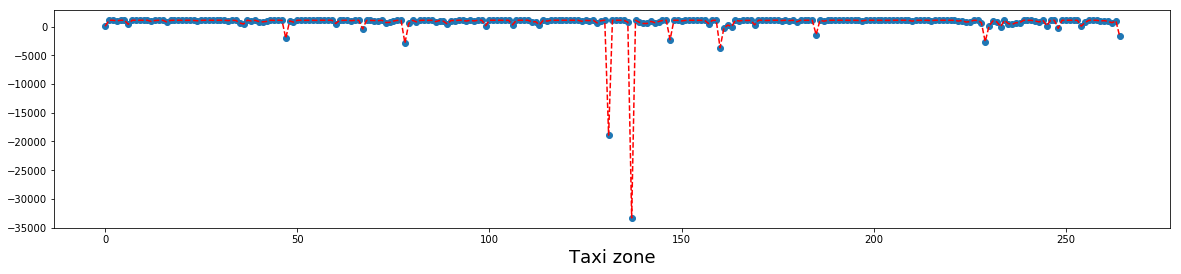

137   -33298.824785
131   -18889.596166
160    -3691.626818
78     -2892.133092
229    -2642.214703
dtype: float64


In [114]:
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.xlabel('Taxi zone',fontsize=18)
plt.show()
print (pd.Series(GM.score_samples(X),index=result.index).sort_values().head())


# also check for tiny clusters
#print (pd.Series(GM.predict(X)).value_counts())

### Read Subway data

In [378]:
time_series_exits =pd.read_csv('subway/time_series_exits.csv')
time_series_entries =pd.read_csv('subway/time_series_entries.csv')

In [499]:
entries_spatial = pd.read_csv('subway/spatial_entries.csv')
exits_spatial = pd.read_csv('subway/spatial_exits.csv')

In [263]:
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [500]:
entries_spatial = entries_spatial.T.reset_index().T.reset_index()
exits_spatial = exits_spatial.T.reset_index().T.reset_index()
del entries_spatial['index']
del exits_spatial['index']
entries_spatial.columns = ['Zone','entries']
exits_spatial.columns = ['Zone','exits']

In [501]:
#add locationID into spatial dataset
entries_spatial = pd.merge(entries_spatial, zone_lookup, how='left', on=['Zone'])
exits_spatial = pd.merge(exits_spatial, zone_lookup, how='left', on=['Zone'])

In [502]:
entries_spatial.to_csv('subway/entries_USI.csv')
exits_spatial.to_csv('subway/exits_USI.csv')

In [384]:
time_series_entries.head()

,Unnamed: 0,3,7,11,14,17,18,21,22,24,...,249,250,254,255,256,257,258,259,260,261
0,2017-07-01 00:00:00,143.500000,5136.0,384.000000,2708.00,2622.0,2058.0,1716.750000,919.000000,2912.0,...,20976.000000,556.00,294.000000,4717.000000,8865.0,1002.000000,1379.000000,1324.750000,3351.7500,6782.0
1,2017-07-01 00:01:00,142.491667,5073.2,382.566667,2696.75,2592.4,2049.6,1705.104167,916.666667,2896.9,...,20905.966667,548.65,308.366667,4706.429167,8837.4,998.666667,1374.408333,1319.720833,3331.6875,6758.7
2,2017-07-01 00:02:00,141.483333,5010.4,381.133333,2685.50,2562.8,2041.2,1693.458333,914.333333,2881.8,...,20835.933333,541.30,322.733333,4695.858333,8809.8,995.333333,1369.816667,1314.691667,3311.6250,6735.4
3,2017-07-01 00:03:00,140.475000,4947.6,379.700000,2674.25,2533.2,2032.8,1681.812500,912.000000,2866.7,...,20765.900000,533.95,337.100000,4685.287500,8782.2,992.000000,1365.225000,1309.662500,3291.5625,6712.1
4,2017-07-01 00:04:00,139.466667,4884.8,378.266667,2663.00,2503.6,2024.4,1670.166667,909.666667,2851.6,...,20695.866667,526.60,351.466667,4674.716667,8754.6,988.666667,1360.633333,1304.633333,3271.5000,6688.8


In [385]:
time_series_exits.head()

,Unnamed: 0,3,7,11,14,17,18,21,22,24,...,249,250,254,255,256,257,258,259,260,261
0,2017-07-01 00:00:00,323.750000,8102.000000,266.000000,3641.000000,4314.000000,1972.000000,4807.750000,1005.000000,1979.500000,...,12477.00,1186.000000,234.0,6079.000000,7431.250000,1080.571429,1370.0000,1601.0,7580.000000,3436.000000
1,2017-07-01 00:01:00,321.970833,8016.516667,265.129167,3626.220833,4267.966667,1994.066667,4788.220833,1028.766667,1973.608333,...,12394.45,1171.283333,259.2,6059.329167,7407.145833,1079.685714,1366.2625,1595.4,7552.766667,3431.133333
2,2017-07-01 00:02:00,320.191667,7931.033333,264.258333,3611.441667,4221.933333,2016.133333,4768.691667,1052.533333,1967.716667,...,12311.90,1156.566667,284.4,6039.658333,7383.041667,1078.800000,1362.5250,1589.8,7525.533333,3426.266667
3,2017-07-01 00:03:00,318.412500,7845.550000,263.387500,3596.662500,4175.900000,2038.200000,4749.162500,1076.300000,1961.825000,...,12229.35,1141.850000,309.6,6019.987500,7358.937500,1077.914286,1358.7875,1584.2,7498.300000,3421.400000
4,2017-07-01 00:04:00,316.633333,7760.066667,262.516667,3581.883333,4129.866667,2060.266667,4729.633333,1100.066667,1955.933333,...,12146.80,1127.133333,334.8,6000.316667,7334.833333,1077.028571,1355.0500,1578.6,7471.066667,3416.533333


In [386]:
time_series_exits.shape

(44640, 157)

In [387]:
#calculate the mean counts for each taxi zones
mean_exits = time_series_exits.mean().astype('int')
mean_entries = time_series_entries.mean().astype('int')

In [388]:
#transpose the dataset a-->entris, b-->exits
a = time_series_entries.T
a.columns = a.iloc[0,:]
b = time_series_exits.T
b.columns = a.iloc[0,:]

In [389]:
a = a.iloc[1:,:]
b = b.iloc[1:,:]

In [390]:
a['mean_c']=mean_entries
b['mean_c']=mean_exits

(array([  9.,  18.,  14.,  12.,   8.,  10.,   7.,  13.,   7.,   8.]),
 array([   41. ,   532.4,  1023.8,  1515.2,  2006.6,  2498. ,  2989.4,
         3480.8,  3972.2,  4463.6,  4955. ]),
 <a list of 10 Patch objects>)

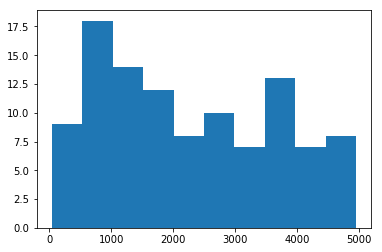

In [391]:
#explore the entries, find out threshold for outliers
plt.hist(a.mean_c[a.mean_c<5000],bins=10)

(array([ 20.,  20.,  20.,  14.,  10.,   7.,   9.,   3.,   5.,   4.]),
 array([    0. ,   481.8,   963.6,  1445.4,  1927.2,  2409. ,  2890.8,
         3372.6,  3854.4,  4336.2,  4818. ]),
 <a list of 10 Patch objects>)

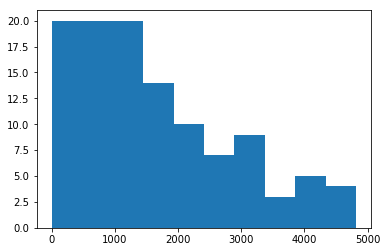

In [392]:
#explore the entries, find out threshold for outliers
plt.hist(b.mean_c[b.mean_c<5000],bins=10)

## Remove subway temporal data Outliers

In [393]:
#remove outliers
a = a[a.mean_c<5000]
b = b[b.mean_c<5000]

In [394]:
a.head()

Unnamed: 0,2017-07-01 00:00:00,2017-07-01 00:01:00,2017-07-01 00:02:00,2017-07-01 00:03:00,2017-07-01 00:04:00,2017-07-01 00:05:00,2017-07-01 00:06:00,2017-07-01 00:07:00,2017-07-01 00:08:00,2017-07-01 00:09:00,...,2017-07-31 23:51:00,2017-07-31 23:52:00,2017-07-31 23:53:00,2017-07-31 23:54:00,2017-07-31 23:55:00,2017-07-31 23:56:00,2017-07-31 23:57:00,2017-07-31 23:58:00,2017-07-31 23:59:00,mean_c
3,143.5,142.492,141.483,140.475,139.467,138.458,137.45,136.442,135.433,134.425,...,349,349,349,349,349,349,349,349,349,334
11,384,382.567,381.133,379.7,378.267,376.833,375.4,373.967,372.533,371.1,...,287.637,284.9,282.163,279.425,276.688,273.95,271.212,268.475,265.738,872
14,2708,2696.75,2685.5,2674.25,2663,2651.75,2640.5,2629.25,2618,2606.75,...,2336.47,2319.87,2303.26,2286.65,2270.04,2253.43,2236.82,2220.22,2203.61,4955
17,2622,2592.4,2562.8,2533.2,2503.6,2474,2444.4,2414.8,2385.2,2355.6,...,1798.3,1792.93,1787.57,1782.2,1776.83,1771.47,1766.1,1760.73,1755.37,3162
18,2058,2049.6,2041.2,2032.8,2024.4,2016,2007.6,1999.2,1990.8,1982.4,...,1942.5,1935.33,1928.17,1921,1913.83,1906.67,1899.5,1892.33,1885.17,3660


In [395]:
#find overlapping zones for entries and exits
temp = list(a.index & b.index)

#remain the dataset with zones in the overlapping list
a = a.ix[temp]
b = b.ix[temp]

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [396]:
a.head()

Unnamed: 0,2017-07-01 00:00:00,2017-07-01 00:01:00,2017-07-01 00:02:00,2017-07-01 00:03:00,2017-07-01 00:04:00,2017-07-01 00:05:00,2017-07-01 00:06:00,2017-07-01 00:07:00,2017-07-01 00:08:00,2017-07-01 00:09:00,...,2017-07-31 23:51:00,2017-07-31 23:52:00,2017-07-31 23:53:00,2017-07-31 23:54:00,2017-07-31 23:55:00,2017-07-31 23:56:00,2017-07-31 23:57:00,2017-07-31 23:58:00,2017-07-31 23:59:00,mean_c
3,143.5,142.492,141.483,140.475,139.467,138.458,137.45,136.442,135.433,134.425,...,349,349,349,349,349,349,349,349,349,334
11,384,382.567,381.133,379.7,378.267,376.833,375.4,373.967,372.533,371.1,...,287.637,284.9,282.163,279.425,276.688,273.95,271.212,268.475,265.738,872
14,2708,2696.75,2685.5,2674.25,2663,2651.75,2640.5,2629.25,2618,2606.75,...,2336.47,2319.87,2303.26,2286.65,2270.04,2253.43,2236.82,2220.22,2203.61,4955
17,2622,2592.4,2562.8,2533.2,2503.6,2474,2444.4,2414.8,2385.2,2355.6,...,1798.3,1792.93,1787.57,1782.2,1776.83,1771.47,1766.1,1760.73,1755.37,3162
18,2058,2049.6,2041.2,2032.8,2024.4,2016,2007.6,1999.2,1990.8,1982.4,...,1942.5,1935.33,1928.17,1921,1913.83,1906.67,1899.5,1892.33,1885.17,3660


In [397]:
b.head()

Unnamed: 0,2017-07-01 00:00:00,2017-07-01 00:01:00,2017-07-01 00:02:00,2017-07-01 00:03:00,2017-07-01 00:04:00,2017-07-01 00:05:00,2017-07-01 00:06:00,2017-07-01 00:07:00,2017-07-01 00:08:00,2017-07-01 00:09:00,...,2017-07-31 23:51:00,2017-07-31 23:52:00,2017-07-31 23:53:00,2017-07-31 23:54:00,2017-07-31 23:55:00,2017-07-31 23:56:00,2017-07-31 23:57:00,2017-07-31 23:58:00,2017-07-31 23:59:00,mean_c
3,323.75,321.971,320.192,318.413,316.633,314.854,313.075,311.296,309.517,307.738,...,697,697,697,697,697,697,697,697,697,252
11,266,265.129,264.258,263.387,262.517,261.646,260.775,259.904,259.033,258.163,...,275.4,273.467,271.533,269.6,267.667,265.733,263.8,261.867,259.933,241
14,3641,3626.22,3611.44,3596.66,3581.88,3567.1,3552.32,3537.55,3522.77,3507.99,...,3655.5,3628,3600.5,3573,3545.5,3518,3490.5,3463,3435.5,2787
17,4314,4267.97,4221.93,4175.9,4129.87,4083.83,4037.8,3991.77,3945.73,3899.7,...,4203,4206.22,4209.44,4212.67,4215.89,4219.11,4222.33,4225.56,4228.78,2208
18,1972,1994.07,2016.13,2038.2,2060.27,2082.33,2104.4,2126.47,2148.53,2170.6,...,1811.6,1781.87,1752.13,1722.4,1692.67,1662.93,1633.2,1603.47,1573.73,2174


In [398]:
#transpose the dataset
a_ = a.T.convert_objects(convert_numeric=True)
b_ = b.T.convert_objects(convert_numeric=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


## Remove subway Spatial data Outliers

In [399]:
entries_spatial = entries_spatial.convert_objects(convert_numeric=True)
exits_spatial = exits_spatial.convert_objects(convert_numeric=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [400]:
entries_spatial.index = entries_spatial.LocationID
exits_spatial.index = exits_spatial.LocationID

In [445]:
entries_spatial.columns = ['Zone', 'entries', 'LocationID2', 'Borough', 'service_zone']
exits_spatial.columns = ['Zone', 'exits', 'LocationID2', 'Borough', 'service_zone']

In [368]:
temp2 = list(map(int, temp))

In [446]:
#remove outliers
en = entries_spatial.ix[temp2]
ex = exits_spatial.ix[temp2]

In [426]:
len(en)

106

In [447]:
en = en.reset_index()
del en['LocationID2']
ex = ex.reset_index()
del ex['LocationID2']

In [434]:
#conduct t-test to compare the mean value between entries and exits of different zones.
t_stat, p_val = stats.ttest_ind(a_, b_, equal_var=False)

In [455]:
#conduct t-test to compare the mean value between entries and exits of different zones.
stats.ttest_ind(en.entries, ex.exits, equal_var=False)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [435]:
print('%.2f'%(len(abs(t_stat)<2)/len(t_stat)*100) + '%'
      ' taxi zones having identical mean values between Subway entries and exits.')

100.00% taxi zones having identical mean values between Subway entries and exits.


In [436]:
a_ = a_.reset_index()
b_ = b_.reset_index()

## Saving point for subway data after removing outliers

In [456]:
a_.to_csv('subway/entries_temporal.csv')
b_.to_csv('subway/exits_temporal.csv')
en.to_csv('subway/entries_spatial.csv')
ex.to_csv('subway/exits_spatial.csv')

## Draw maps for taxi and subway

In [492]:
pd.read_csv('subway/exits_temporal.csv')

(106, 6)

In [456]:
#read shapefile
taxi_zones = gpd.read_file('taxi_zones/taxi_zones.shp')
taxi_zones = taxi_zones.to_crs(epsg=4326)

In [577]:
entries_spatial = pd.read_csv('subway/entries_spatial.csv')
exits_spatial = pd.read_csv('subway/exits_spatial.csv')
#entries_spatial = pd.read_csv('subway/entries_USI.csv')
#exits_spatial = pd.read_csv('subway/exits_USI.csv')

In [578]:
#join the taxi_zone shapefile with subway data
entries_shp = pd.merge(taxi_zones, entries_spatial, how="right", on='LocationID')
exits_shp = pd.merge(taxi_zones, exits_spatial, how="right",on='LocationID')

In [579]:
#drop convert dataframe into geodataframes.
crs = {'init' :'epsg:4326'}
entries_shp = gpd.GeoDataFrame(entries_shp, crs=crs)
exits_shp = gpd.GeoDataFrame(exits_shp, crs=crs)

In [580]:
#drop the overlapping columns
entries_shp = entries_shp.drop(['Zone','Borough','Unnamed: 0'], axis=1)
exits_shp = exits_shp.drop(['Zone','Borough','Unnamed: 0'], axis=1)

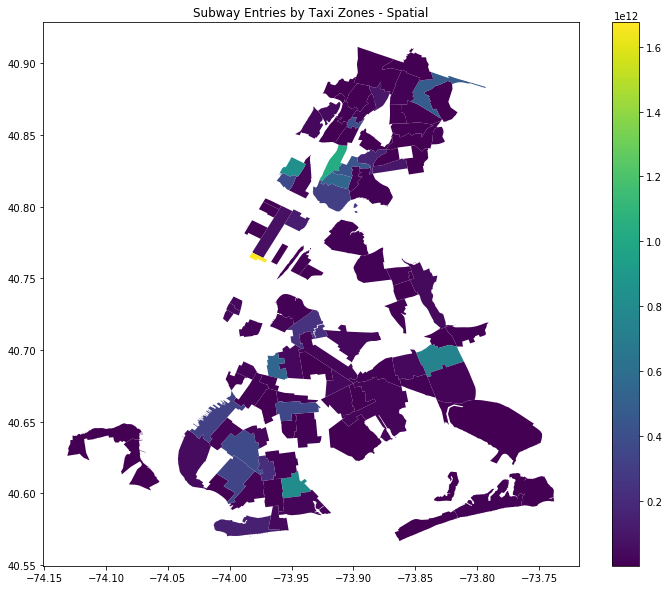

In [581]:
f, ax = plt.subplots(figsize=(12,10))
entries_shp.plot(ax=ax, column='entries',legend=True);
plt.title('Subway Entries by Taxi Zones - Spatial')

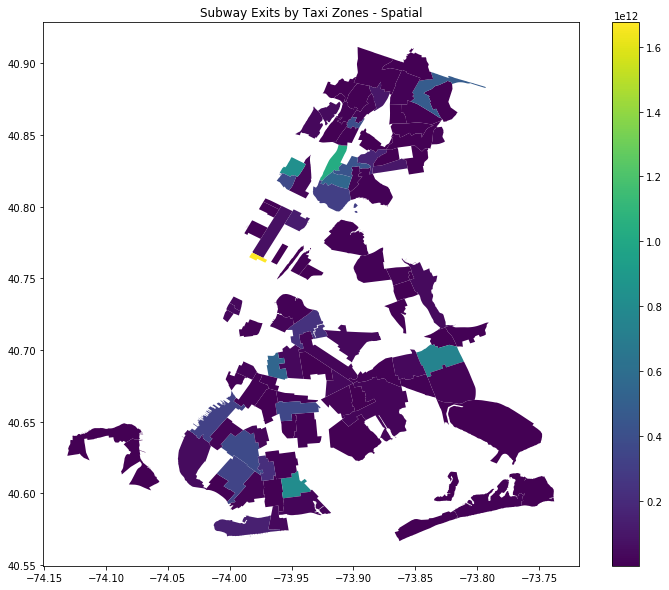

In [582]:
f, ax = plt.subplots(figsize=(12,10))
exits_shp.plot(ax=ax, column='exits',legend=True);
plt.title('Subway Exits by Taxi Zones - Spatial')

## Read Citibike data

In [18]:
end_hourly = pd.read_csv('Citibike_files/citibike_end_temporal_hourly.csv')
start_hourly = pd.read_csv('Citibike_files/citibike_start_temporal_hourly.csv')
end_dow = pd.read_csv('Citibike_files/citibike_end_temporal_dow.csv')
start_dow = pd.read_csv('Citibike_files/citibike_start_temporal_dow.csv')
end_dow_hourly = pd.read_csv('Citibike_files/citibike_end_temporal_dow_hourly.csv')
start_dow_hourly = pd.read_csv('Citibike_files/citibike_start_temporal_dow_hourly.csv')

In [19]:
start_hourly.columns = ['LocationID', 0.0, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,
                       17.0,18.0,19.0,20.0,21.0,22.0,23.0]
end_hourly.columns = ['LocationID', 0.0, 1.0, 2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,
                       17.0,18.0,19.0,20.0,21.0,22.0,23.0]

In [20]:
start_hourly = start_hourly.iloc[2:,:]
end_hourly = end_hourly.iloc[2:,:]

In [21]:
start_dow.columns = ['LocationID', 0.0, 1.0, 2.0,3.0,4.0,5.0,6.0]
end_dow.columns = ['LocationID', 0.0, 1.0, 2.0,3.0,4.0,5.0,6.0]
start_dow = start_dow.iloc[2:,:]
end_dow = end_dow.iloc[2:,:]

In [86]:
t_stat, p_val = stats.ttest_ind(start_hourly.T.convert_objects(convert_numeric=True), 
                                end_hourly.T.convert_objects(convert_numeric=True), equal_var=False)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


## Reformat the taxi data

In [90]:
#open the taxi file
drops_temporal = pd.read_csv('drops_temporal.csv')
picks_temporal = pd.read_csv('picks_temporal.csv')

In [91]:
del drops_temporal['Unnamed: 0']
del picks_temporal['Unnamed: 0']

In [92]:
drops_temporal.head()

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,65,801,769,478,655,532,184,48,25,284,...,378,19.2,27.2,589,691.1,528,762,700,227,36.2
1,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0,0.0,0,0,0,1,0.0
2,99,43,44,65,85,95,100,99,85,53,...,80,87.0,46.0,25,59.0,76,75,73,77,77.0
3,582,236,122,283,444,433,594,559,527,186,...,582,659.0,206.0,74,116.0,173,225,410,604,550.0
4,18,6,5,2,9,10,16,21,28,5,...,12,16.0,6.0,0,2.0,2,9,12,5,8.0


In [95]:
df_drops = pd.DataFrame(data={'drops':drops_temporal.sum()})

## Plotting subway data

In [162]:
entries = pd.read_csv('subway/entries_temporal.csv')
exits = pd.read_csv('subway/exits_temporal.csv')

entries = entries.iloc[:,1:]
entries = entries.rename(columns={'Unnamed: 0.1':'Date'})

exits= exits.iloc[:,1:]
exits = exits.rename(columns={'Unnamed: 0.1':'Date'})

In [163]:
exits.Date[0]

'2017-07-01 00:00:00'

In [164]:
l = list(exits.Date[::180])

In [165]:
l.remove('mean_c')

In [166]:
l.remove('2017-07-01 00:00:00')

In [167]:
l.append('2017-08-01 00:00:00')

In [168]:
l

['2017-07-01 03:00:00',
 '2017-07-01 06:00:00',
 '2017-07-01 09:00:00',
 '2017-07-01 12:00:00',
 '2017-07-01 15:00:00',
 '2017-07-01 18:00:00',
 '2017-07-01 21:00:00',
 '2017-07-02 00:00:00',
 '2017-07-02 03:00:00',
 '2017-07-02 06:00:00',
 '2017-07-02 09:00:00',
 '2017-07-02 12:00:00',
 '2017-07-02 15:00:00',
 '2017-07-02 18:00:00',
 '2017-07-02 21:00:00',
 '2017-07-03 00:00:00',
 '2017-07-03 03:00:00',
 '2017-07-03 06:00:00',
 '2017-07-03 09:00:00',
 '2017-07-03 12:00:00',
 '2017-07-03 15:00:00',
 '2017-07-03 18:00:00',
 '2017-07-03 21:00:00',
 '2017-07-04 00:00:00',
 '2017-07-04 03:00:00',
 '2017-07-04 06:00:00',
 '2017-07-04 09:00:00',
 '2017-07-04 12:00:00',
 '2017-07-04 15:00:00',
 '2017-07-04 18:00:00',
 '2017-07-04 21:00:00',
 '2017-07-05 00:00:00',
 '2017-07-05 03:00:00',
 '2017-07-05 06:00:00',
 '2017-07-05 09:00:00',
 '2017-07-05 12:00:00',
 '2017-07-05 15:00:00',
 '2017-07-05 18:00:00',
 '2017-07-05 21:00:00',
 '2017-07-06 00:00:00',
 '2017-07-06 03:00:00',
 '2017-07-06 06:

In [74]:
data = pd.DataFrame(data={'AB':l})

In [75]:
data['Date'], data['Time'] = data['AB'].str.split(' ', 1).str

In [76]:
li = [0,1,2,3,4,5,6,7]
li = li*31

In [77]:
d={'Date':data.Date, 'Hour':li, 'picks':list(picks_temporal.sum()),'drops':list(drops_temporal.sum())}
df_taxi = pd.DataFrame(data=d)

In [78]:
pivoted = df_taxi.pivot_table(['picks', 'drops'],
                           index=df_taxi.Date,
                           columns=df_taxi.Hour,
                           fill_value=0)

In [79]:
pivoted.head()

drops                                                          \
Hour              0        1        2        3        4         5         6   
Date                                                                          
2017-07-01  94794.0  43772.0  46357.0  80486.0  99215.0  103227.0  119306.0   
2017-07-02  84621.0  40013.0  33648.0  70944.0  90802.0   94541.0   90783.0   
2017-07-03  44697.2  19783.0  44927.0  64640.0  81576.0   95783.0   87703.0   
2017-07-04  57463.0  23519.0  23663.0  48001.0  74844.0   94531.0  100317.0   
2017-07-05  53024.0  21998.0  76543.0  84408.0  82390.0   91079.0  105082.0   

                        picks                                                \
Hour               7        0        1        2        3        4         5   
Date                                                                          
2017-07-01       0.0  94794.0  43772.0  46357.1  80486.0  99215.1  103227.0   
2017-07-02  107442.0  84621.0  40013.0  33648.0  70944.0  90802.0   94541.0   
2017-07-03   86027.1  44697.0  19783.0  44927.1  64640.1  81576.0   95783.1   
2017-07-04   88165.0  57463.2  23519.1  23663.2  48001.2  74844.0   94531.0   
2017-07-05  103361.0  53024.2  21998.2  76543.2  84408.0  82390.0   91079.1   

                                
Hour               6         7  
Date                            
2017-07-01  119306.1       0.0  
2017-07-02   90783.1  107442.0  
2017-07-03   87703.1   86027.1  
2017-07-04  100317.0   88165.0  
2017-07-05  105082.1  103361.0

In [80]:
pivoted.to_csv('pivoted_taxi.csv')

In [136]:
pivoted.columns = [i for i in range(16)]

In [138]:
X = pivoted/pivoted.sum()

In [156]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=2,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

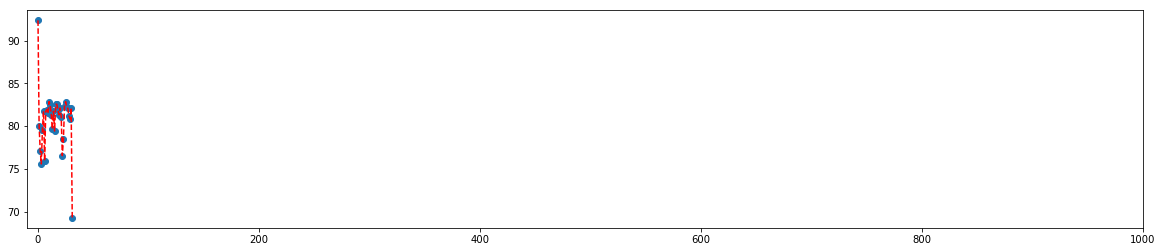

Date
2017-08-01    69.289486
2017-07-04    75.584126
2017-07-07    75.964082
2017-07-23    76.559986
2017-07-03    77.150150
dtype: float64
1    31
0     1
dtype: int64


In [159]:
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
plt.xlim(-10,1000)
#plt.xticks(range(100),df_taxi.Date,rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.show()
print (pd.Series(GM.score_samples(X),index=X.index).sort_values().head())
print

# also check for tiny clusters
print (pd.Series(GM.predict(X)).value_counts())

## Correlation Analysis

In [3]:
drops_spatial = pd.read_csv('drops_spatial.csv')
picks_spatial = pd.read_csv('picks_spatial.csv')
drops_temporal = pd.read_csv('drops_temporal.csv')
picks_temporal = pd.read_csv('picks_temporal.csv')
exits_temporal = pd.read_csv('subway/exits_temporal.csv')
entries_temporal = pd.read_csv('subway/entries_temporal.csv')
end_hourly = pd.read_csv('Citibike_files/citibike_end_temporal_hourly.csv')
start_hourly = pd.read_csv('Citibike_files/citibike_start_temporal_hourly.csv')
end_hourly = end_hourly.fillna(0)
start_hourly = start_hourly.fillna(0)

In [4]:
#taxi's pickups and dropoffs are highly correltated by taxi zones
np.corrcoef(drops_temporal.iloc[:,1:].sum(axis=1),picks_temporal.iloc[:,1:].sum(axis=1))

array([[ 1.        ,  0.96341984],
       [ 0.96341984,  1.        ]])

In [5]:
#taxi's pickups and dropoffs are perfectly correltated by time
np.corrcoef(drops_temporal.iloc[:,1:].sum(),picks_temporal.iloc[:,1:].sum())

array([[ 1.,  1.],
       [ 1.,  1.]])

In [6]:
#subway data's entry swipes and exit swipes are highly correlated by taxi zones.
np.corrcoef(entries_temporal.iloc[:,2:].sum(),exits_temporal.iloc[:,2:].sum())

array([[ 1.        ,  0.86339999],
       [ 0.86339999,  1.        ]])

In [7]:
#subway data's entry swipes and exit swipes are moderately correlated over time.
np.corrcoef(entries_temporal.iloc[:,2:].sum(axis=1),exits_temporal.iloc[:,2:].sum(axis=1))

array([[ 1.        ,  0.60266115],
       [ 0.60266115,  1.        ]])

In [8]:
#citibike data's starts and ends are highly correlated by 24 hours
np.corrcoef(start_hourly.iloc[2:,1:].sum(),end_hourly.iloc[2:,1:].sum())

array([[ 1.        ,  0.99403696],
       [ 0.99403696,  1.        ]])

In [9]:
#citibike data's starts and ends are highly correlated by zones
np.corrcoef(start_hourly.iloc[2:,1:].sum(axis=1),end_hourly.iloc[2:,1:].sum(axis=1))

array([[ 1.        ,  0.99966201],
       [ 0.99966201,  1.        ]])

In [10]:
#taxi drops and citibike end's are not very correlated by zones. we wont implement citi bike data anymore.
np.corrcoef(drops_temporal.iloc[:260,1:].sum(axis=1),end_hourly.iloc[2:,1:].sum(axis=1))

array([[ 1.        ,  0.16492197],
       [ 0.16492197,  1.        ]])

## Experiment 0

In [3]:
drops_temporal = pd.read_csv('drops_temporal.csv')
picks_temporal = pd.read_csv('picks_temporal.csv')

In [4]:
del picks_temporal['Unnamed: 0']
del drops_temporal['Unnamed: 0']

In [128]:
result = pd.concat([picks_temporal, drops_temporal], axis=1)

In [129]:
l = [i for i in range(0,496)]
result.columns = l

In [133]:
X=result.convert_objects(convert_numeric=True)
X=X/X.sum()
X = X.fillna(0)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [134]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

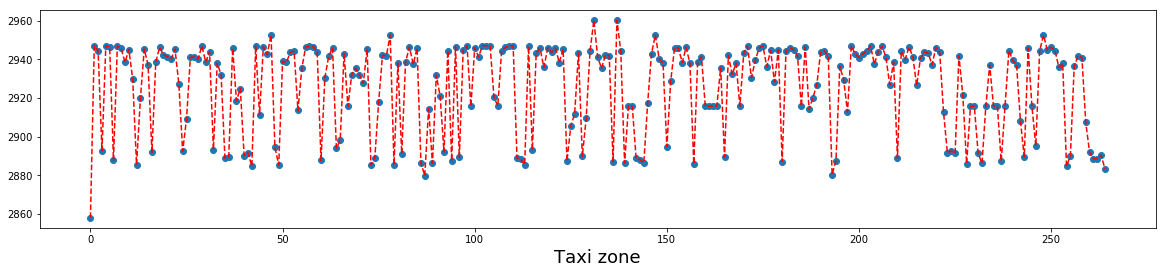

0      2857.991275
87     2879.762306
193    2880.354979
264    2883.282657
42     2884.690001
dtype: float64


In [135]:
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.xlabel('Taxi zone',fontsize=18)
plt.show()
print (pd.Series(GM.score_samples(X),index=result.index).sort_values().head())


# also check for tiny clusters
#print (pd.Series(GM.predict(X)).value_counts())

## Experiment 2 - taxi data

In [252]:
pivoted_taxi = pd.read_csv('pivoted_taxi.csv')

In [253]:
pivoted_taxi.columns = ['Date', 'drops.0-3', 'drops.3-6', 'drops.6-9', 'drops.9-12', 'drops.12-15',
       'drops.15-18', 'drops.18-21', 'drops.21-24', 'picks.0-3', 'picks.3-6', 'picks.6-9',
       'picks.9-12', 'picks.12-15', 'picks.15-18', 'picks.18-21', 'picks.21-24']

In [254]:
pivoted_taxi = pivoted_taxi.iloc[2:-1,:]

In [255]:
X = pivoted_taxi.iloc[:,1:]
X = X/X.sum()

In [257]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

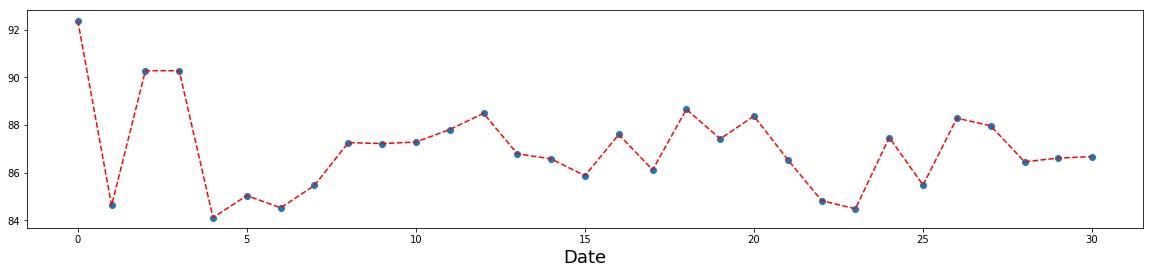

6     84.109781
25    84.477916
8     84.521116
3     84.618392
24    84.822490
dtype: float64


In [258]:
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.xlabel('Date',fontsize=18)
plt.show()
print (pd.Series(GM.score_samples(X),index=X.index).sort_values().head())


# also check for tiny clusters
#print (pd.Series(GM.predict(X)).value_counts())

## Preprocessing Taxi data

In [170]:
len(l)

248

In [174]:
drops = drops_temporal.T
picks = picks_temporal.T
drops.index = l
picks.index = l

In [177]:
picks = picks.reset_index()
drops = drops.reset_index()

In [191]:
picks['index'] = pd.to_datetime(picks['index'])
picks['Date'] = picks['index'].dt.date
picks['Hour'] = picks['index'].dt.hour

In [193]:
drops['index'] = pd.to_datetime(drops['index'])
drops['Date'] = drops['index'].dt.date
drops['Hour'] = drops['index'].dt.hour

In [195]:
picks.to_csv('picks.csv')
drops.to_csv('drops.csv')

## Saving point 1

In [100]:
picks = pd.read_csv('picks.csv')
drops = pd.read_csv('drops.csv')

In [101]:
del picks['Unnamed: 0']
del drops['Unnamed: 0']

In [102]:
picks.Hour[picks.Hour == 0] = 24
drops.Hour[drops.Hour == 0] = 24

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Experiment 1 - Gaussian

In [103]:
exp1_picks = picks.groupby('Hour').sum().T
exp1_drops = drops.groupby('Hour').sum().T

In [104]:
exp1 = pd.concat([exp1_picks, exp1_drops], axis=1)

In [105]:
X = exp1
X = X/X.sum()
X = X.fillna(0)

In [106]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

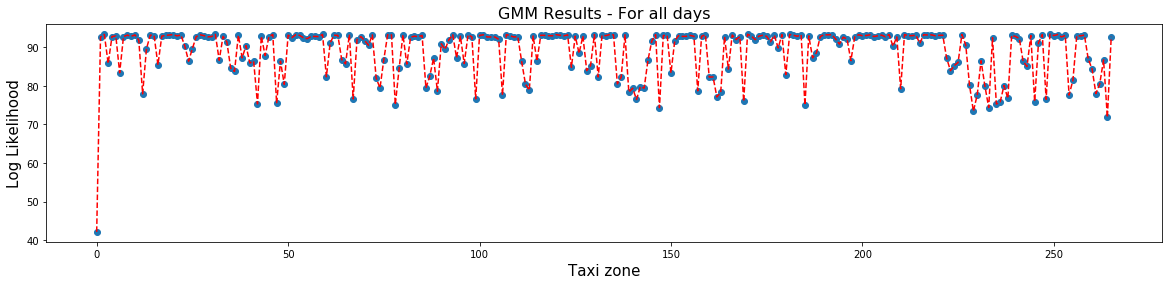

0      42.144065
264    71.783371
229    73.394802
147    74.322233
233    74.351269
dtype: float64
0    177
2     45
3     22
1     18
4      4
dtype: int64


In [107]:
import matplotlib.pylab as plt
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.xlabel('Taxi zone',fontsize=15)
plt.ylabel('Log Likelihood', fontsize=15)
plt.title('GMM Results - For all days', fontsize=16)
plt.show()
print (pd.Series(GM.score_samples(X),index=X.index).sort_values().head())
fig.savefig('plots/exp1-GMM.png')

# also check for tiny clusters
print (pd.Series(GM.predict(X)).value_counts())

## Experiment 1 - K_means

In [108]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage

# Choose a range of cluster numbers that you would like to evalulate for single link metric:
range_n_clusters = range(2,10)
Z = linkage(X, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.7257674886376856
For n_clusters = 3, the average silhouette_score is : 0.707260975006955
For n_clusters = 4, the average silhouette_score is : 0.6897744209919517
For n_clusters = 5, the average silhouette_score is : 0.6926156453636669
For n_clusters = 6, the average silhouette_score is : 0.6937932290107695
For n_clusters = 7, the average silhouette_score is : 0.6385873643070258
For n_clusters = 8, the average silhouette_score is : 0.6539684940035666
For n_clusters = 9, the average silhouette_score is : 0.6471007775249903


In [109]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(X)

# distance to each cluster center
res1=pd.DataFrame(KM.transform(X))
res1.head()

,0,1,2
0,0.017165,0.029604,0.063584
1,0.005347,0.034252,0.072650
2,0.002364,0.031267,0.069719
3,0.012349,0.017768,0.057586
4,0.004993,0.033902,0.072328


In [110]:
# add cluster and distance information for each data record
res1=pd.DataFrame(KM.transform(X))
res1=pd.concat((res1,pd.DataFrame(KM.fit_predict(X))),axis=1)
res1.columns=list(range(3))+["cluster"]
res1.loc[:,"score"]=res1.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res1.sort_values("score",ascending=False)[:5]

,0,1,2,cluster,score
137,0.095905,0.077891,0.056478,2,0.056478
78,0.092693,0.067228,0.053600,2,0.053600
160,0.108123,0.086130,0.052143,2,0.052143
147,0.066846,0.046353,0.050539,1,0.046353
264,0.059336,0.045243,0.057247,1,0.045243


In [111]:
print (res1['cluster'].value_counts())

0    201
1     46
2     19
Name: cluster, dtype: int64


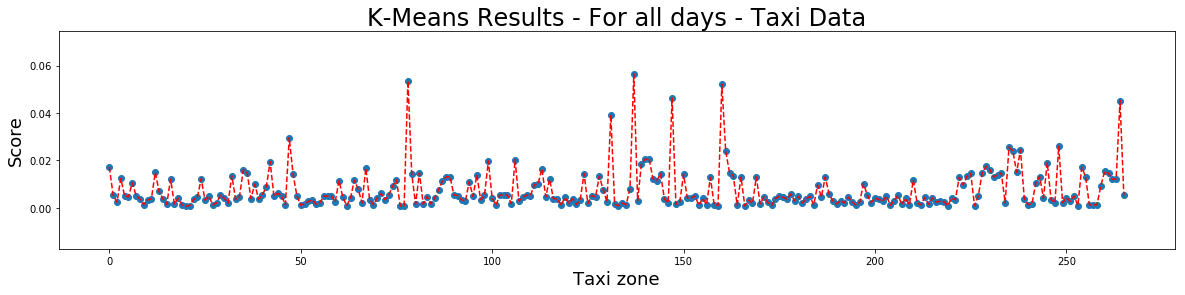

In [112]:
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),res1.score)
plt.xlabel('Taxi zone',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('K-Means Results - For all days - Taxi Data', fontsize=24)
plt.plot(res1.score,"r--")
fig.savefig('plots/exp1-KM.png')

In [134]:
X = X.convert_objects(convert_numeric=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [149]:
std1['cluster'] = res1['cluster'][:-1]

In [150]:
'mean':np.mean(X.iloc[:-1,:],axis=1)

,mean,cluster
0,0.002715,NaN
1,0.000002,NaN
2,0.000752,NaN
3,0.004152,NaN
4,0.000088,NaN
5,0.000177,NaN
6,0.008897,NaN
7,0.000064,NaN
8,0.000402,NaN
9,0.001258,NaN


In [133]:
std1

,mean,cluster
0,0.002715,0 0\n1 0\n2 0\n3 0\n4 ...
1,0.000002,0 0\n1 0\n2 0\n3 0\n4 ...
2,0.000752,0 0\n1 0\n2 0\n3 0\n4 ...
3,0.004152,0 0\n1 0\n2 0\n3 0\n4 ...
4,0.000088,0 0\n1 0\n2 0\n3 0\n4 ...
5,0.000177,0 0\n1 0\n2 0\n3 0\n4 ...
6,0.008897,0 0\n1 0\n2 0\n3 0\n4 ...
7,0.000064,0 0\n1 0\n2 0\n3 0\n4 ...
8,0.000402,0 0\n1 0\n2 0\n3 0\n4 ...
9,0.001258,0 0\n1 0\n2 0\n3 0\n4 ...


## Experiment 2 - Gaussian

In [18]:
picks['dow'] = pd.to_datetime(picks['index']).dt.dayofweek
drops['dow'] = pd.to_datetime(drops['index']).dt.dayofweek

In [19]:
picks.to_csv('picks.csv')
drops.to_csv('drops.csv')

In [20]:
picks_weekday = picks[picks.dow<5]
drops_weekday = drops[drops.dow<5]
picks_weekend = picks[picks.dow>=5]
drops_weekend = drops[drops.dow>=5]

In [21]:
picks_weekday.shape

(169, 269)

In [22]:
picks_weekend.shape

(79, 269)

In [23]:
exp2_picks = picks_weekday[(picks_weekday.Hour==9) |(picks_weekday.Hour==18)].groupby('Hour').sum().T.iloc[:-1,:]
exp2_drops = drops_weekday[(drops_weekday.Hour==9) |(drops_weekday.Hour==18)].groupby('Hour').sum().T.iloc[:-1,:]

In [24]:
exp2 = pd.concat((exp2_picks,exp2_drops),axis=1)

In [25]:
X = exp2
X = X/X.sum()
X = X.fillna(0)

In [26]:
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

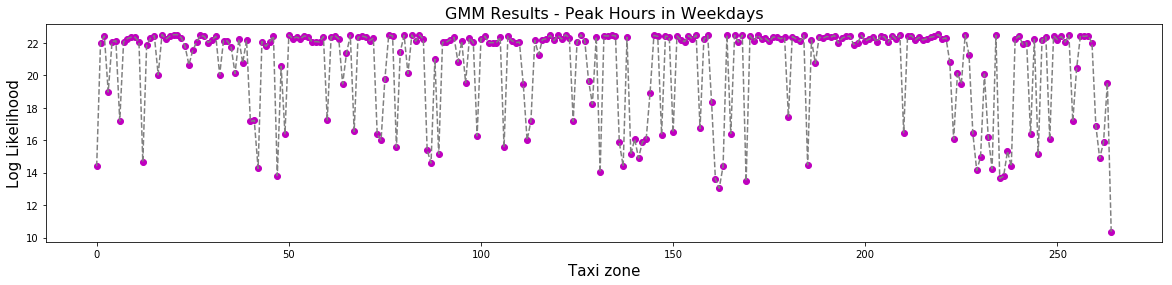

264    10.357909
162    13.033272
169    13.468065
161    13.605500
235    13.637105
dtype: float64
0    208
1     32
2     19
4      5
3      1
dtype: int64


In [48]:
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X),c="m")
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"--",c='gray')
plt.xlabel('Taxi zone',fontsize=15)
plt.ylabel('Log Likelihood', fontsize=15)
plt.title('GMM Results - Peak Hours in Weekdays', fontsize=16)
plt.show()
print (pd.Series(GM.score_samples(X),index=X.index).sort_values().head())


# also check for tiny clusters
print (pd.Series(GM.predict(X)).value_counts())
fig.savefig('plots/exp2-GMM.png')

## Experiment 2 - K_means

In [49]:
# Choose a range of cluster numbers that you would like to evalulate for single link metric:
range_n_clusters = range(3,10)
Z = linkage(X, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 3, the average silhouette_score is : 0.764579599078324
For n_clusters = 4, the average silhouette_score is : 0.7577704355813308
For n_clusters = 5, the average silhouette_score is : 0.717731522001093
For n_clusters = 6, the average silhouette_score is : 0.672126162525273
For n_clusters = 7, the average silhouette_score is : 0.6800720918932446
For n_clusters = 8, the average silhouette_score is : 0.6622091695203095
For n_clusters = 9, the average silhouette_score is : 0.6608669018030129


In [50]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(X)

# distance to each cluster center
res2=pd.DataFrame(KM.transform(X))
res2.head()

,0,1,2
0,0.006805,0.019205,0.043086
1,0.003179,0.024060,0.049604
2,0.001657,0.022530,0.048166
3,0.004384,0.017529,0.044188
4,0.003025,0.023906,0.049472


In [51]:
# add cluster and distance information for each data record
res2=pd.DataFrame(KM.transform(X))
res2=pd.concat((res2,pd.DataFrame(KM.fit_predict(X))),axis=1)
res2.columns=list(range(3))+["cluster"]
res2.loc[:,"score"]=res2.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res2.sort_values("score",ascending=False)[:5]

,0,1,2,cluster,score
160,0.085364,0.069745,0.043820,2,0.043820
235,0.042265,0.021687,0.019036,2,0.019036
264,0.019623,0.016656,0.033655,1,0.016656
47,0.035766,0.016100,0.024769,1,0.016100
185,0.036102,0.015615,0.020705,1,0.015615


In [52]:
print (res2['cluster'].value_counts())

0    221
1     34
2     10
Name: cluster, dtype: int64


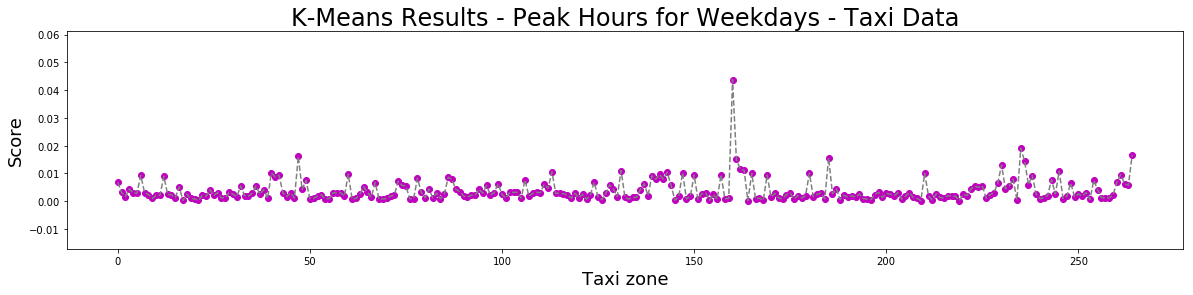

In [58]:
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),res2.score, c='m')
plt.xlabel('Taxi zone',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('K-Means Results - Peak Hours for Weekdays - Taxi Data', fontsize=24)
plt.plot(res2.score,"--",c='grey')
fig.savefig('plots/exp2-KM.png')

## Experiment 3 - Gaussian

In [59]:
exp3_picks = picks_weekend.groupby('Hour').sum().T.iloc[:-1,:]
exp3_drops = drops_weekend.groupby('Hour').sum().T.iloc[:-1,:]

In [60]:
exp3 = pd.concat((exp3_picks, exp3_drops),axis=1)

In [61]:
X = exp3
X = X/X.sum()
X = X.fillna(0)

In [62]:
GM=GaussianMixture(n_components=5,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

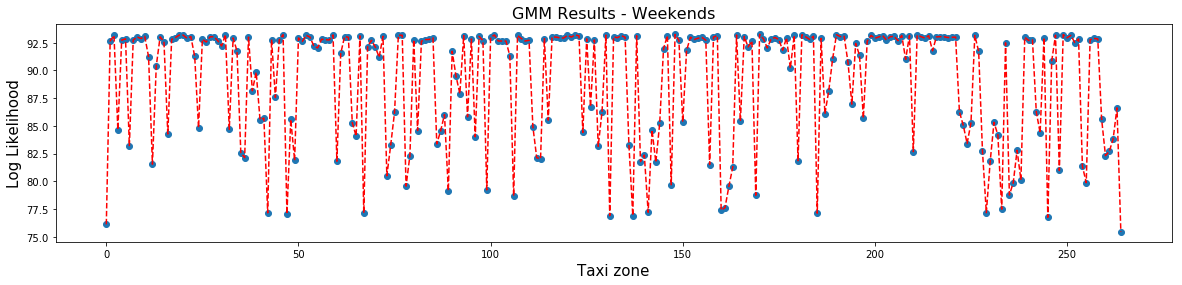

264    75.444997
0      76.112642
245    76.752520
131    76.897357
137    76.906687
dtype: float64
0    183
3     48
2     14
4     12
1      8
dtype: int64


In [63]:
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X))
#plt.xlim(-10,1000)
#plt.xticks(range(len(X))[::20],days[::20],rotation=90)
plt.plot(GM.score_samples(X),"r--")
plt.xlabel('Taxi zone',fontsize=15)
plt.ylabel('Log Likelihood', fontsize=15)
plt.title('GMM Results - Weekends', fontsize=16)
plt.show()
print (pd.Series(GM.score_samples(X),index=X.index).sort_values().head())


# also check for tiny clusters
print (pd.Series(GM.predict(X)).value_counts())

fig.savefig('plots/exp3-GMM.png')

## Experiment 3 - K-means

In [64]:
# Choose a range of cluster numbers that you would like to evalulate for single link metric:
range_n_clusters = range(3,10)
Z = linkage(X, 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 3, the average silhouette_score is : 0.6886732845297392
For n_clusters = 4, the average silhouette_score is : 0.6768549011769566
For n_clusters = 5, the average silhouette_score is : 0.6801378361397784
For n_clusters = 6, the average silhouette_score is : 0.6351056393767346
For n_clusters = 7, the average silhouette_score is : 0.6321977058423238
For n_clusters = 8, the average silhouette_score is : 0.6341258927969318
For n_clusters = 9, the average silhouette_score is : 0.6303517503475754


In [65]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=999)
scor=KM.fit_predict(X)

# distance to each cluster center
res3=pd.DataFrame(KM.transform(X))
res3.head()

,0,1,2
0,0.016220,0.056143,0.025387
1,0.004723,0.064253,0.030264
2,0.001506,0.061036,0.026993
3,0.015203,0.045834,0.011583
4,0.004358,0.063903,0.029896


In [66]:
# add cluster and distance information for each data record
res3=pd.DataFrame(KM.transform(X))
res3=pd.concat((res3,pd.DataFrame(KM.fit_predict(X))),axis=1)
res3.columns=list(range(3))+["cluster"]
res3.loc[:,"score"]=res3.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res3.sort_values("score",ascending=False)[:5]

,0,1,2,cluster,score
78,0.113844,0.066391,0.091913,1,0.066391
137,0.081412,0.054024,0.065600,1,0.054024
147,0.087668,0.053043,0.069380,1,0.053043
264,0.060140,0.052603,0.046508,2,0.046508
131,0.082129,0.044266,0.062444,1,0.044266


In [67]:
print (res3['cluster'].value_counts())

0    186
2     57
1     22
Name: cluster, dtype: int64


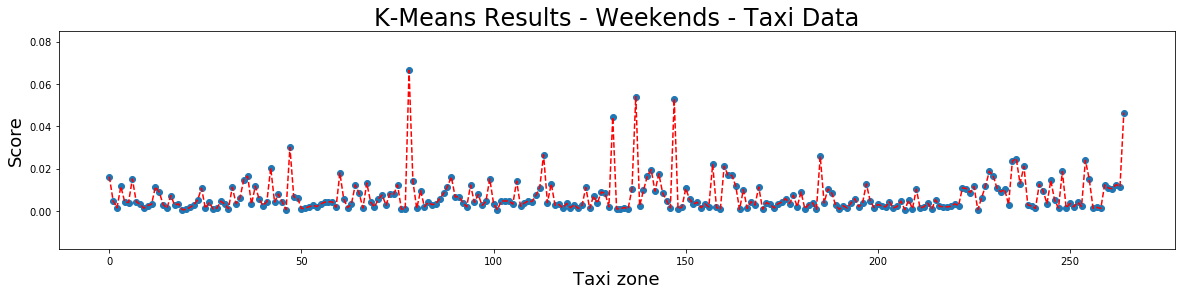

In [68]:
fig = plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),res3.score)
plt.xlabel('Taxi zone',fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('K-Means Results - Weekends - Taxi Data', fontsize=24)
plt.plot(res3.score,"r--")
fig.savefig('plots/exp3-KM.png')

## Mapping

In [69]:
#read shapefile
taxi_zones = gpd.read_file('taxi_zones/taxi_zones.shp')
taxi_zones = taxi_zones.to_crs(epsg=4326)
taxi_zones.shape

(263, 7)

In [70]:
taxi_zones['exp3_km'] = res3.iloc[:-2,:].score
taxi_zones['exp2_km'] = res2.iloc[:-2,:].score
taxi_zones['exp1_km'] = res1.iloc[:-2,:].score

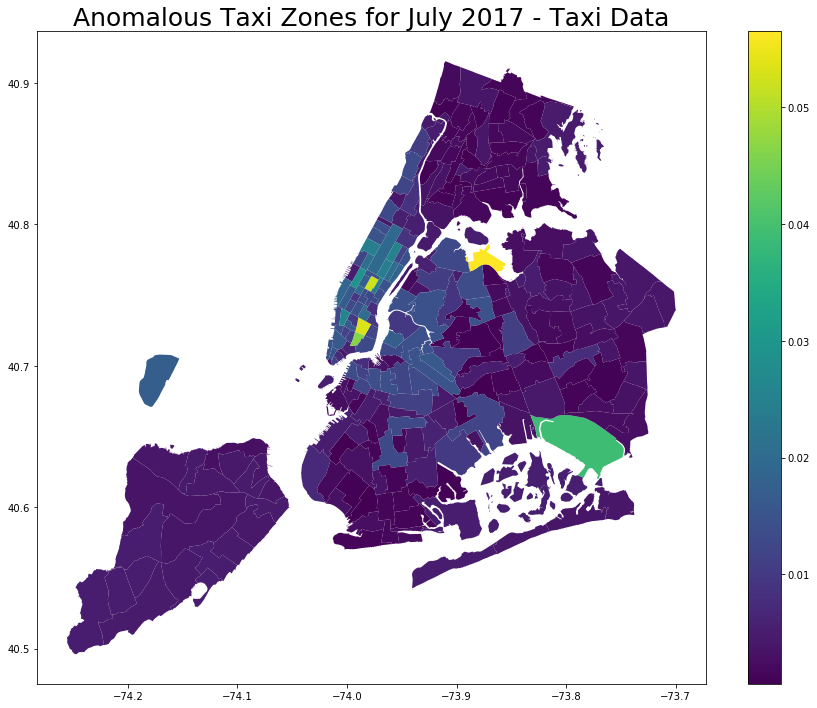

In [71]:
f, ax = plt.subplots(figsize=(15,12))
taxi_zones.plot(ax=ax, column='exp1_km',legend=True);
plt.title('Anomalous Taxi Zones for July 2017 - Taxi Data', fontsize = 25)
f.savefig('plots/exp1_map.png')

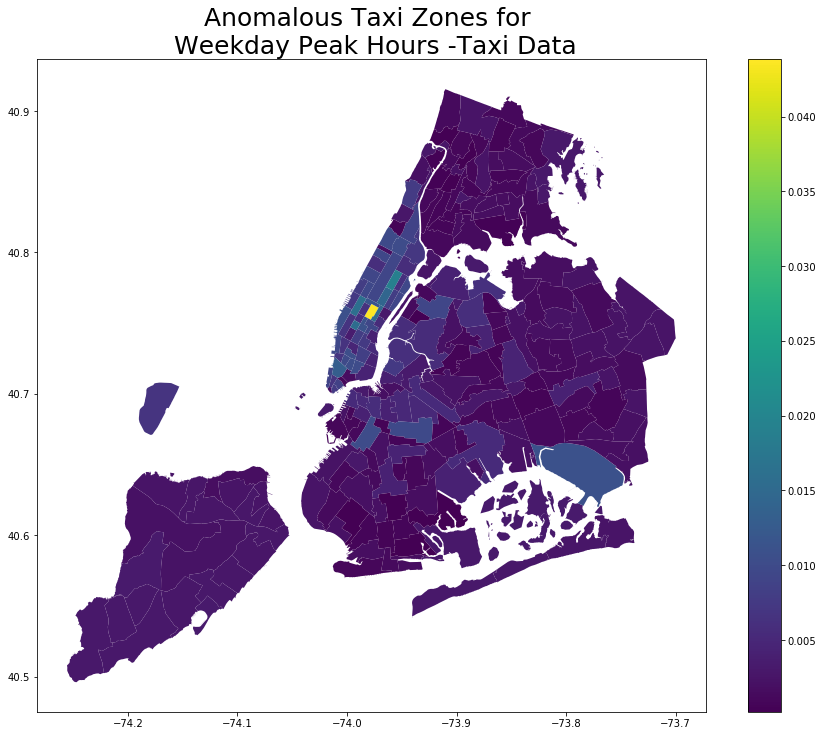

In [72]:
f, ax = plt.subplots(figsize=(15,12))
taxi_zones.plot(ax=ax, column='exp2_km',legend=True);
plt.title('Anomalous Taxi Zones for \n Weekday Peak Hours -Taxi Data', fontsize = 25)
f.savefig('plots/exp2_map.png')

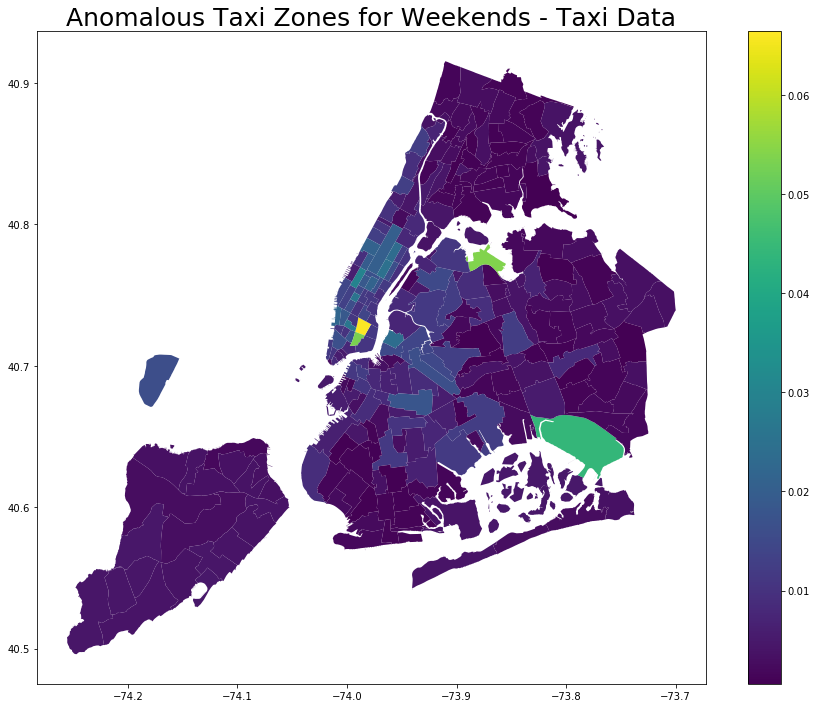

In [73]:
f, ax = plt.subplots(figsize=(15,12))
taxi_zones.plot(ax=ax, column='exp3_km',legend=True);
plt.title('Anomalous Taxi Zones for Weekends - Taxi Data', fontsize = 25)
f.savefig('plots/exp3_map.png')

In [74]:
d = pd.DataFrame(data={'Datetime':l})
d.to_csv('datetime_3hour.csv')

NameError: name 'l' is not defined

In [ ]:
res1.sort_values("score",ascending=False)[:7]

In [75]:
res2.sort_values("score",ascending=False)[:6]

,0,1,2,cluster,score
160,0.085364,0.069745,0.043820,2,0.043820
235,0.042265,0.021687,0.019036,2,0.019036
264,0.019623,0.016656,0.033655,1,0.016656
47,0.035766,0.016100,0.024769,1,0.016100
185,0.036102,0.015615,0.020705,1,0.015615
161,0.057301,0.040323,0.015140,2,0.015140


In [76]:
res3.sort_values("score",ascending=False)[:6]

,0,1,2,cluster,score
78,0.113844,0.066391,0.091913,1,0.066391
137,0.081412,0.054024,0.065600,1,0.054024
147,0.087668,0.053043,0.069380,1,0.053043
264,0.060140,0.052603,0.046508,2,0.046508
131,0.082129,0.044266,0.062444,1,0.044266
47,0.086996,0.030024,0.061929,1,0.030024


In [77]:
res1.sort_values("score",ascending=False)[-100:].index

Int64Index([ 22,  33, 201,  68,  92,  53, 246, 123,  72, 221,  97, 167,  10,
             25, 138, 191, 205, 179, 189, 107, 202,  93, 217,  52, 251, 218,
            194,  59, 130, 216, 149,   2, 196, 172, 247, 146, 199,  55, 249,
            211, 234,  66, 192, 120, 181, 134,  28,  31, 168, 125, 105, 190,
             17,  51,  84, 241, 170,  80,  82,  54,  15, 207, 132, 214, 122,
            148, 240, 258, 135, 256,  69, 156,   9,  19,  27, 158, 212,  46,
            184, 209, 257, 195,  50, 164, 101, 204, 154, 118, 173, 253,  21,
            159, 219, 133,  62, 226, 166,  76,  20,  77],
           dtype='int64')

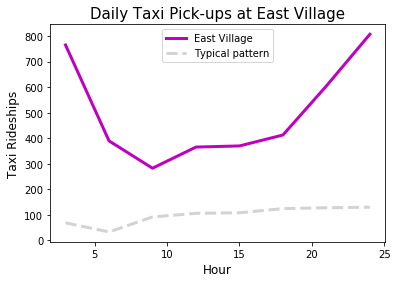

In [258]:
# plt.plot(exp1[exp1.index=="100"].T.iloc[:8]+exp1[exp1.index=="100"].T.iloc[9:])
# plt.plot(exp1[exp1.index=="147"].T.iloc[:8]+exp1[exp1.index=="147"].T.iloc[9:])
# plt.plot(exp1[exp1.index=="160"].T.iloc[:8]+exp1[exp1.index=="160"].T.iloc[9:])
# plt.plot(exp1[exp1.index=="47"].T.iloc[:8]+exp1[exp1.index=="47"].T.iloc[9:])
# plt.plot(exp1[exp1.index=="235"].T.iloc[:8]+exp1[exp1.index=="235"].T.iloc[9:])
fig = plt.figure()
plt.title('Daily Taxi Pick-ups at East Village',fontsize=15)
plt.ylabel('Taxi Rideships',fontsize=12)
plt.xlabel('Hour',fontsize=12)
plt.plot(exp1[exp1.index=='79'].T.iloc[:8]/31,c='m',linewidth=3,label = 'East Village')
plt.plot(exp1[exp1.index=='50'].T.iloc[:8]/31,c='lightgrey',linestyle ='--',linewidth=3, label = 'Typical pattern')
plt.legend()
fig.savefig('plots/EastVillage.png')
#plt.plot(X[X.index=="147"].T.iloc[:8], label = '147')
#plt.plot(exp1[exp1.index=="160"].T.iloc[:8], label = '160')
#plt.plot(exp1[exp1.index=="47"].T.oc[:8], label = '47')
#plt.plot(exp1[exp1.index=="235"].T.iloc[:8], label = '235')
#plt.legend()

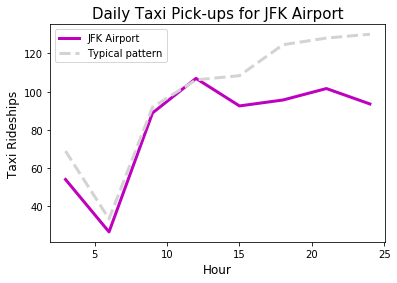

In [254]:
fig = plt.figure()
plt.title('Daily Taxi Pick-ups for JFK Airport',fontsize=15)
plt.ylabel('Taxi Rideships',fontsize=12)
plt.xlabel('Hour',fontsize=12)
plt.plot(exp1[exp1.index=='132'].T.iloc[:8]/31,c='m',linewidth=3,label = 'JFK Airport' )
plt.plot(exp1[exp1.index=='50'].T.iloc[:8]/31,c='lightgrey',linestyle ='--',linewidth=3, label = 'Typical pattern')
plt.legend()
fig.savefig('plots/JFK.png')

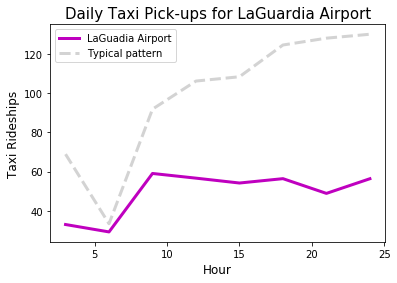

In [257]:
fig = plt.figure()
plt.title('Daily Taxi Pick-ups for LaGuardia Airport',fontsize=15)
plt.ylabel('Taxi Rideships',fontsize=12)
plt.xlabel('Hour',fontsize=12)
plt.plot(exp1[exp1.index=='138'].T.iloc[:8]/31,c='m',linewidth=3,label = 'LaGuadia Airport')
plt.plot(exp1[exp1.index=='50'].T.iloc[:8]/31,c='lightgrey',linestyle ='--',linewidth=3, label = 'Typical pattern')
plt.legend()
fig.savefig('plots/LGD.png')

In [79]:
exp2[exp2.index=='161'].T

,161
Hour,
9,29872.0
18,60490.0
9,84193.0
18,42456.0


In [225]:
taxi_zones.sort_values("exp1_km",ascending=False)[:5][['zone','exp1_km']]

,zone,exp1_km
137,LaGuardia Airport,0.056478
78,East Village,0.053600
160,Midtown Center,0.052143
147,Lower East Side,0.046353
131,JFK Airport,0.039198


In [226]:
taxi_zones.sort_values("exp2_km",ascending=False)[:5][['zone','exp2_km']]

,zone,exp2_km
160,Midtown Center,0.043820
235,Upper East Side North,0.019036
47,Clinton East,0.016100
185,Penn Station/Madison Sq West,0.015615
161,Midtown East,0.015140


In [227]:
taxi_zones.sort_values("exp3_km",ascending=False)[:5][['zone','exp3_km']]

,zone,exp3_km
78,East Village,0.066391
137,LaGuardia Airport,0.054024
147,Lower East Side,0.053043
131,JFK Airport,0.044266
47,Clinton East,0.030024


In [83]:
#138 - LaGardia Airport
#79 - east village
#161 - Midtown Center
#148 - Madison
#132 - JFK Airport
#48 - Clinton East

#161 - Midtown Center
#236 - Upper East Side North
#48 - Clinton East
#186 - Penn Station
#162 - Midtown East

#79 - east village
#138 - LaGardia Airport
#148 - Madison
#132 - JFK Airport
#48 - Clinton East

In [84]:
exp_1 = res1.iloc[:-3,:]
exp_2 = res2.iloc[:-2,:]
exp_3 = res3.iloc[:-2,:] 

In [185]:
zero_data = np.std(exp_1.score[exp_1.cluster==0])
one_data = np.std(exp_1.score[exp_1.cluster==1])
two_data = np.std(exp_1.score[exp_1.cluster==2])

In [187]:
print(zero_data)
print(one_data)
print(two_data)

0.003349295740856112
0.006615169363066864
0.014095063654390677


In [188]:
zero_data = np.std(exp_2.score[exp_2.cluster==0])
one_data = np.std(exp_2.score[exp_2.cluster==1])
two_data = np.std(exp_2.score[exp_2.cluster==2])

In [189]:
print(zero_data)
print(one_data)
print(two_data)

0.0020647988833921134
0.00294114192955643
0.01049916413995306


In [190]:
zero_data = np.std(exp_3.score[exp_3.cluster==0])
one_data = np.std(exp_3.score[exp_3.cluster==1])
two_data = np.std(exp_3.score[exp_3.cluster==2])

In [191]:
print(zero_data)
print(one_data)
print(two_data)

0.0025815653376767356
0.015120203017203859
0.004476366480950981


In [180]:
np.std(exp_1[0])

0.020202892763629427

In [181]:
np.std(exp_1[1])

0.010236344738297619

In [182]:
np.std(exp_1[2])

0.01505525966811182

In [ ]:
np.std(exp_2[1])

In [ ]:
np.std(exp_2[0])

In [ ]:
np.std(exp_2[0])

In [ ]:
np.std(exp_3[0])

In [ ]:
np.std(exp_3[0])

In [ ]:
np.std(exp_3[0])

In [89]:
exp_1.to_csv('exp_1.csv')
exp_2.to_csv('exp_2.csv')
exp_3.to_csv('exp_3.csv')